In [411]:
import numpy as np

X = np.linspace(start=1, stop=15, num=1_000).reshape(-1, 1)


def f(X):
    return 3 / X + (2 * np.sin(X) * np.log(X)) / (2 + np.cos(X))


y = f(X)

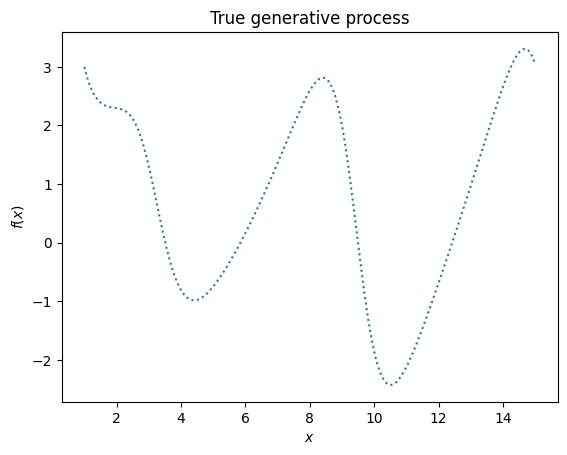

In [412]:
import matplotlib.pyplot as plt

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

In [413]:
from scipy.stats import norm


def expected_improvement(X, current_min_y, gaussian_process):
    mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

    a_pred = []
    for mean, std in zip(mean_prediction, std_prediction):
        a = (current_min_y - mean) * norm.cdf(
            current_min_y, loc=mean, scale=std
        ) + std ** 2 * norm.pdf(current_min_y, loc=mean, scale=std)
        a_pred.append(a)
    return a_pred

In [414]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF


def fit_and_display_model(X_train, y_train):
    kernel = 1 * RBF(length_scale=1, length_scale_bounds=(0.1, 1e2))
    gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20)
    gaussian_process.fit(X_train, y_train)
    print(gaussian_process.kernel_, flush=True)

    mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)
    expected_improvement_values = expected_improvement(
        X, np.min(y_train), gaussian_process
    )

    fig, axs = plt.subplots(2, 1, figsize=(8, 6))

    axs[0].plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
    axs[0].scatter(X_train, y_train, label="Observations")
    axs[0].plot(X, mean_prediction, label="Mean prediction")
    axs[0].fill_between(
        X.ravel(),
        mean_prediction - 1.96 * std_prediction,
        mean_prediction + 1.96 * std_prediction,
        alpha=0.5,
        label=r"95% confidence interval",
    )
    # axs[0].legend()
    axs[0].set_xlabel("$x$")
    axs[0].set_ylabel("$f(x)$")
    _ = axs[0].set_title("Gaussian process regression on noise-free dataset")

    axs[1].plot(
        X, expected_improvement_values, label=r"$f(x) = x \sin(x)$", linestyle="dotted"
    )

    axs[0].set_xlabel("$x$")
    axs[0].set_ylabel("$f(x)$")
    _ = axs[0].set_title("Gaussian process regression on noise-free dataset")

    return expected_improvement_values

2.3**2 * RBF(length_scale=2.41)


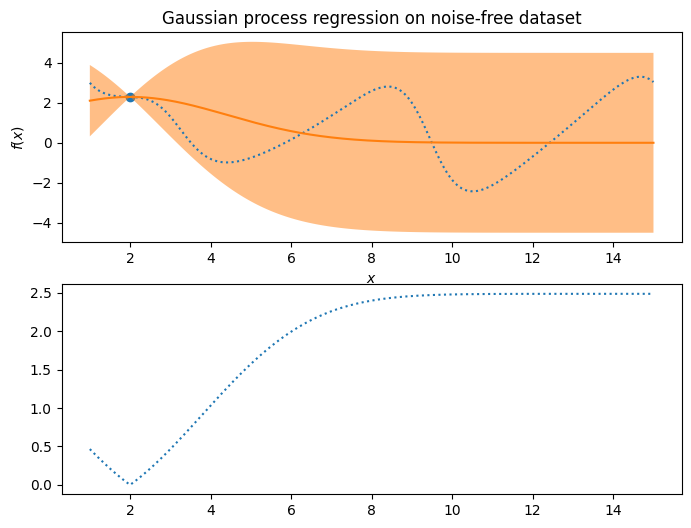

In [415]:
np.random.seed(32)
initial_x = np.array([[2]]).reshape(-1, 1)
X_train, y_train = initial_x, np.array(f(initial_x))

expected_improvement_values = fit_and_display_model(X_train, y_train)

# Select next point to add to dataset

In [416]:
def select_and_add_new_point(expected_improvement_values, X_train, y_train):
    new_x = X[np.argmax(expected_improvement_values)]
    X_train_1 = np.concatenate([X_train, [new_x]], axis=0)
    y_train_1 = np.concatenate([y_train, [f(new_x)]], axis=0)
    return X_train_1, y_train_1

2.69**2 * RBF(length_scale=46.6)
2.82**2 * RBF(length_scale=3.83)
3.01**2 * RBF(length_scale=5.1)
2.32**2 * RBF(length_scale=2.1)
2.13**2 * RBF(length_scale=1.55)
2.09**2 * RBF(length_scale=1.7)
2.05**2 * RBF(length_scale=1.41)
2.08**2 * RBF(length_scale=1.56)
1.88**2 * RBF(length_scale=1.09)
1.83**2 * RBF(length_scale=1.06)


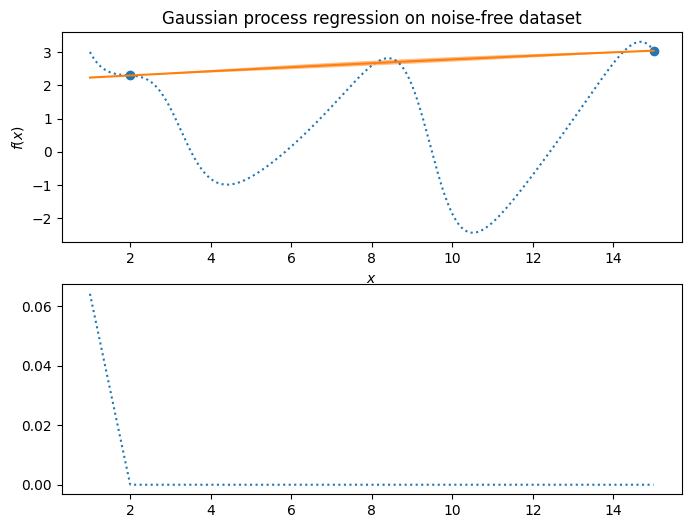

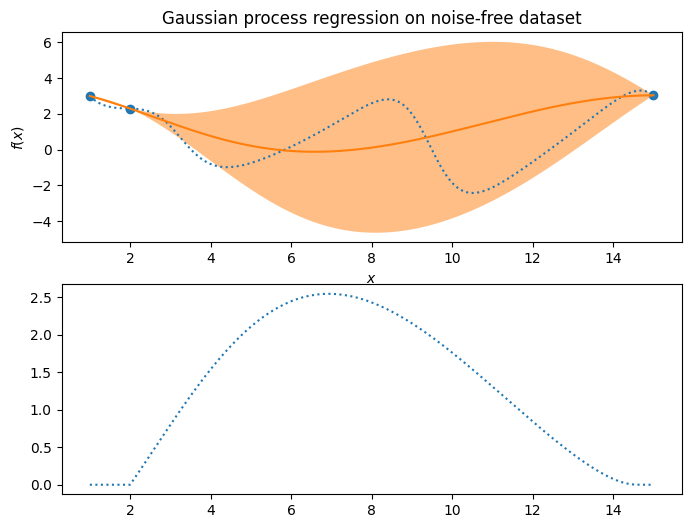

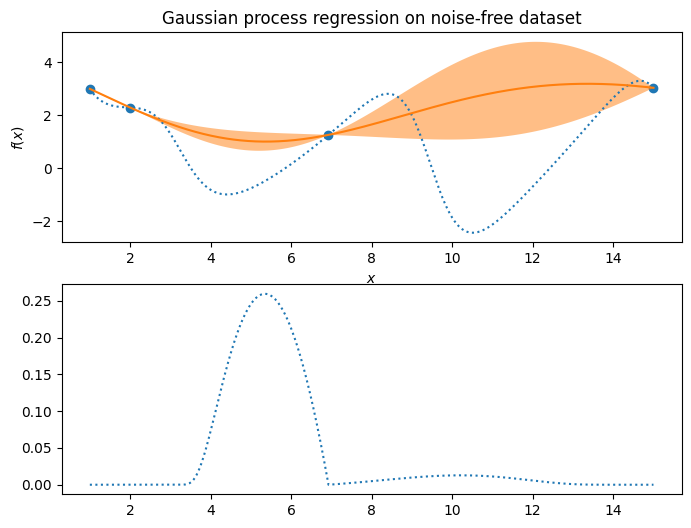

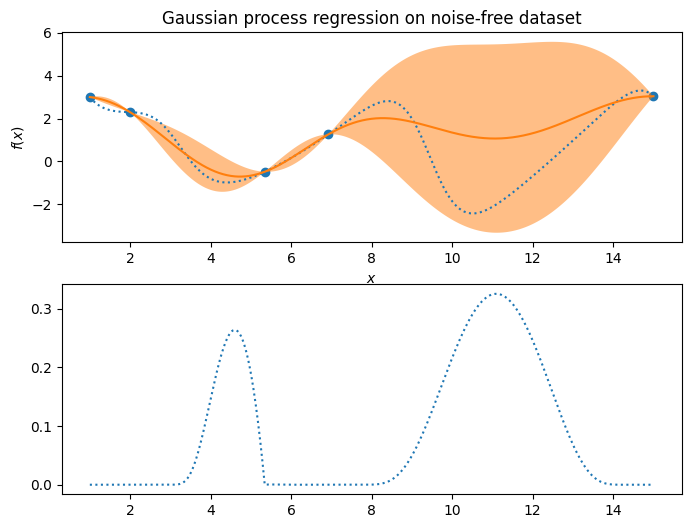

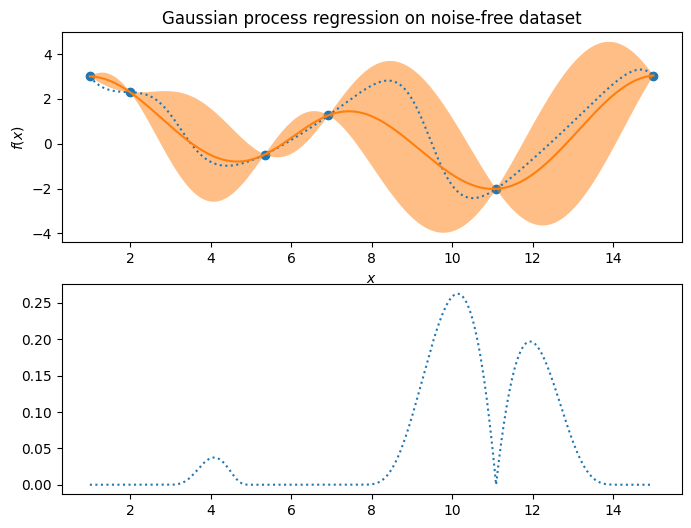

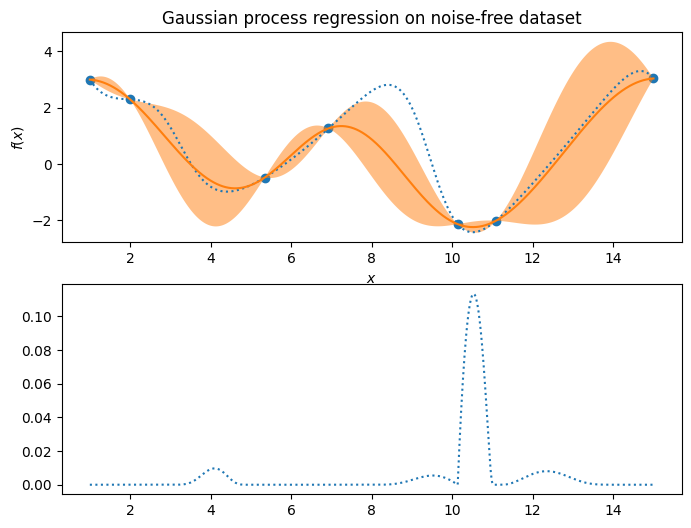

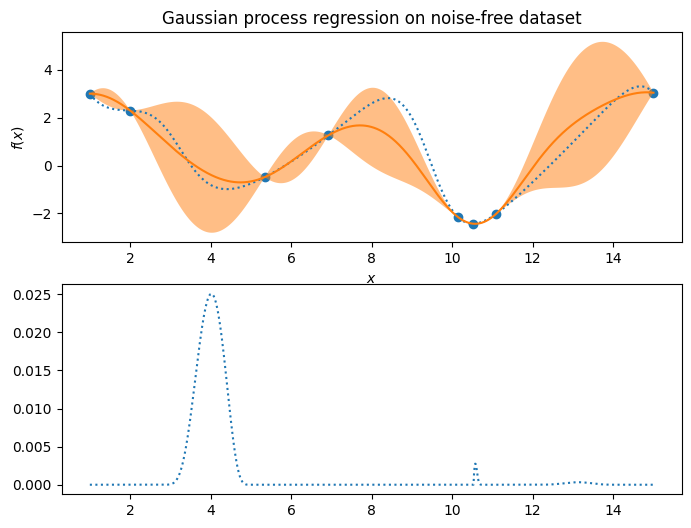

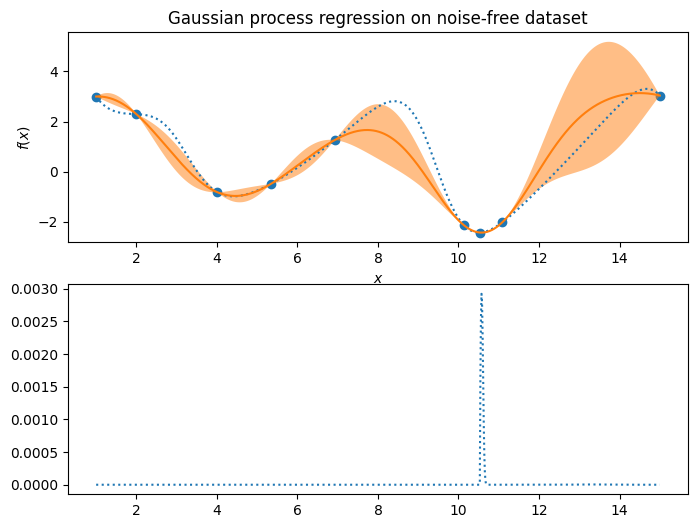

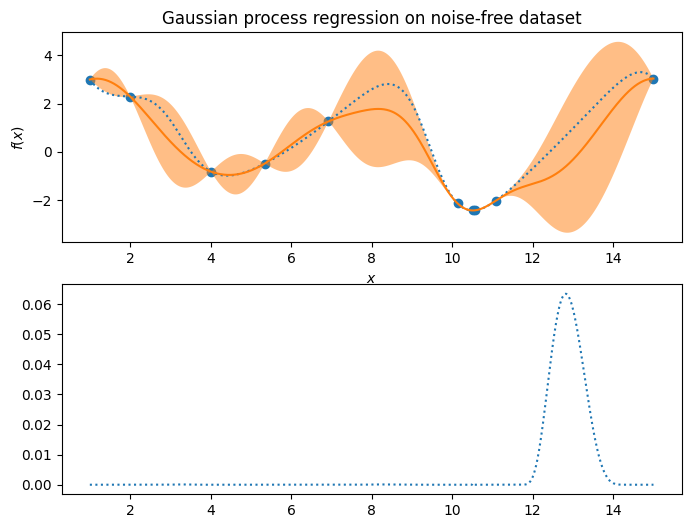

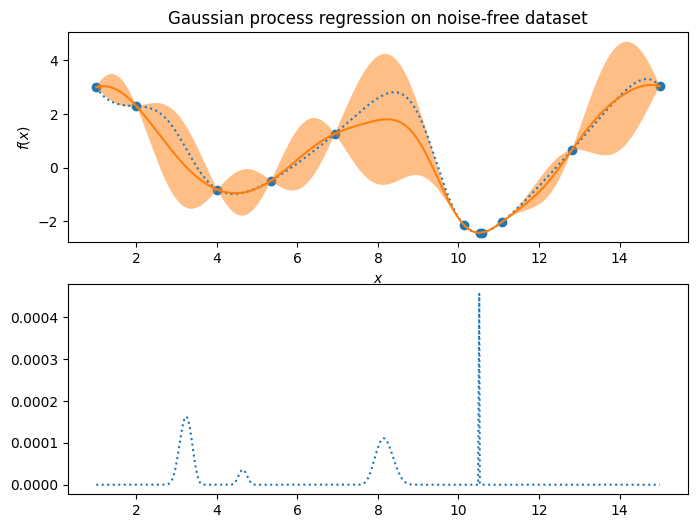

In [417]:
for _ in range(10):
    X_train, y_train = select_and_add_new_point(
        expected_improvement_values, X_train, y_train
    )
    expected_improvement_values = fit_and_display_model(X_train, y_train)

In [405]:
new_x = X[np.argmax(expected_improvement_values)]

In [406]:
new_x, f(new_x)

(array([10.51551552]), array([-2.42819869]))

In [407]:
new_x

array([10.51551552])